In [2]:
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

In [3]:
# Load food data and restaurants data
food = pd.read_pickle("food.pkl")
restaurants = pd.read_pickle("restaurants.pkl")

# Inspection Count per Facility Type

To compare values between differents facility types, we computed total number of establishment for each facility type than divide all the results values by those values.

In [4]:
food_tmp = food.drop_duplicates(subset="License #")
food_tmp = food_tmp.drop_duplicates(subset=["Latitude", "Longitude"])
count_per_facility = food_tmp.groupby("Facility Type").count()['Inspection ID'].sort_values(ascending=False)

In [5]:
count_per_facility

Facility Type
Restaurant       9191
Grocery Store    3360
School            966
Hospital           35
Name: Inspection ID, dtype: int64

Here, we compute how many time there was a inspection for different facility type.

In [6]:
inspection_count_per_facility = food.groupby("Facility Type").count()['Inspection ID'].sort_values(ascending=False)

In [7]:
inspection_count_per_facility_normalized = inspection_count_per_facility / count_per_facility

In [8]:
inspection_count_per_facility_normalized

Facility Type
Restaurant       14.180611
Grocery Store     7.413095
School           12.260870
Hospital         15.400000
Name: Inspection ID, dtype: float64

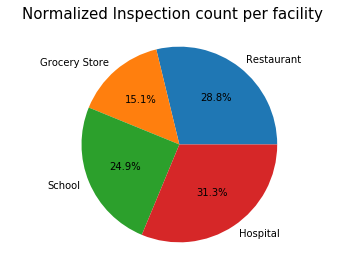

In [9]:
labels = inspection_count_per_facility_normalized.keys()
sizes = inspection_count_per_facility_normalized.values

fig1, ax1 = plt.subplots()
fig1.suptitle("Normalized Inspection count per facility", fontsize=15)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal') 

plt.show()

We can observe that it's the hospital where the most of the inspections have been done.

### Inspection Count per year per Facility Type

In [10]:
years = food["Inspection Date"].unique()

In [11]:
years

array(['2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012',
       '2011', '2010'], dtype=object)

The dataset contains inspections data going from 2010 to 2019.

We plot the inspection count per facility type per year.

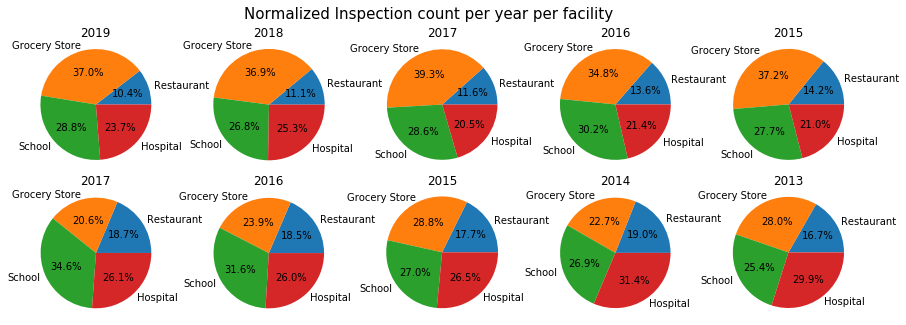

In [12]:
labels = inspection_count_per_facility_normalized.keys()
fig, ax= plt.subplots(2,5,figsize=(15,5))
fig.suptitle("Normalized Inspection count per year per facility", fontsize=15)
for i in range(2):
    for j in range(5):
        data = food[food["Inspection Date"] == years.reshape((2, 5))[i, j]]
        data = data.groupby("Facility Type").count()['Inspection ID'].sort_values()
        data = data / count_per_facility
        sizes = data.values

        ax[i, j].pie(sizes, labels=labels, autopct='%1.1f%%')
        ax[i, j].axis('equal')
        ax[i, j].title.set_text(years[i*2 + j])


plt.show()

### Inspection Count per Facility Type over year

In [13]:
facilities = food["Facility Type"].unique()

In [14]:
# we count inspections number per facility type and per year 
inspection_count_per_year_per_facility = food.groupby(["Facility Type", "Inspection Date"]).count()["Inspection ID"].sort_index() / count_per_facility

restaurant_inspection_count = inspection_count_per_year_per_facility["Restaurant"]
grocery_inspection_count = inspection_count_per_year_per_facility["Grocery Store"]
school_inspection_count = inspection_count_per_year_per_facility["School"]
hospital_inspection_count = inspection_count_per_year_per_facility["Hospital"]

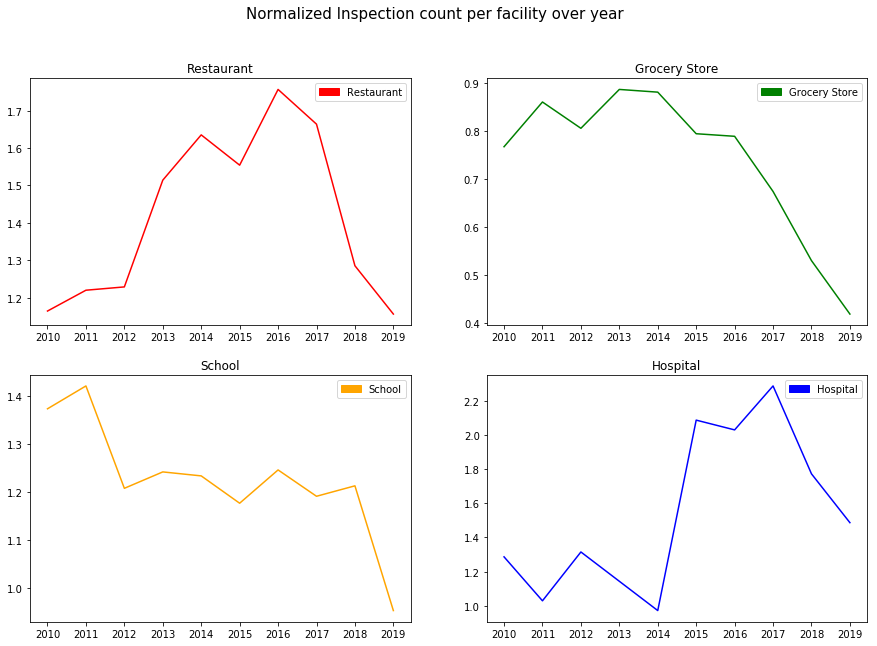

In [15]:
fig, ax= plt.subplots(2,2, figsize=(15, 10))
fig.suptitle("Normalized Inspection count per facility over year", fontsize=15)

ax[0, 0].plot(restaurant_inspection_count, 'red')
ax[0, 1].plot(grocery_inspection_count, 'green')
ax[1, 0].plot(school_inspection_count, 'orange')
ax[1, 1].plot(hospital_inspection_count, 'blue')

ax[0, 0].legend(handles=[mpatches.Patch(color='red', label='Restaurant')])
ax[0, 1].legend(handles=[mpatches.Patch(color='green', label='Grocery Store')])
ax[1, 0].legend(handles=[mpatches.Patch(color='orange', label='School')])
ax[1, 1].legend(handles=[mpatches.Patch(color='blue', label='Hospital')])

ax[0, 0].title.set_text('Restaurant')
ax[0, 1].title.set_text('Grocery Store')
ax[1, 0].title.set_text('School')
ax[1, 1].title.set_text('Hospital')

plt.show()

Thess graphs show how the number of inspections evolve over year per facility.

When we plot these graphs overlapped, it gives as following.

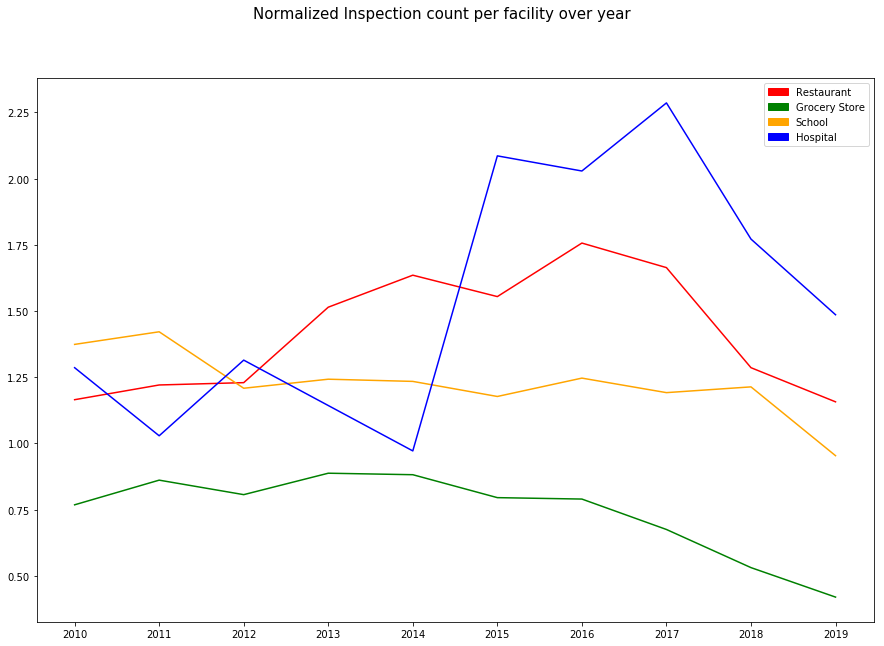

In [16]:
fig = plt.figure(figsize = (15, 10))
fig.suptitle("Normalized Inspection count per facility over year", fontsize=15)

plt.plot(restaurant_inspection_count, 'red')
plt.plot(grocery_inspection_count, 'green')
plt.plot(school_inspection_count, 'orange')
plt.plot(hospital_inspection_count, 'blue')

red_patch = mpatches.Patch(color='red', label='Restaurant')
green_patch = mpatches.Patch(color='green', label='Grocery Store')
orange_patch = mpatches.Patch(color='orange', label='School')
blue_patch = mpatches.Patch(color='blue', label='Hospital')

plt.legend(handles=[red_patch, green_patch, orange_patch, blue_patch])

plt.show()

We can observe that recently there is a diminuation of the inspections for all facility types.

### Inspection Count per Facility Type per Inspection Types

In [17]:
# Filter only most recurrents inspection types
inspectype = ['Canvass', 'Complaint', 'License', 'Suspected Food Poisoning']

food_inspectype_filtered = food.copy()
# group License, License Re-Inspection
food_inspectype_filtered.loc[food_inspectype_filtered['Inspection Type'] == 'License Re-Inspection'] = 'License'
# group Canvass, Canvass Re-Inspection
food_inspectype_filtered.loc[food_inspectype_filtered['Inspection Type'] == 'Canvass Re-Inspection'] = 'Canvass'
# group Complaint, Short Form Complaint, Complaint Re-Inspection
food_inspectype_filtered.loc[food_inspectype_filtered['Inspection Type'].isin(['Short Form Complaint', 'Complaint Re-Inspection'])] = 'Complaint'
# group Suspected Food Poisoning, Suspected Food Poisoning Re-Inspection
food_inspectype_filtered.loc[food_inspectype_filtered['Inspection Type'] == 'Suspected Food Poisoning Re-inspection'] = 'Suspected Food Poisoning'

food_inspectype_filtered = food_inspectype_filtered[food_inspectype_filtered['Inspection Type'].isin(inspectype)]

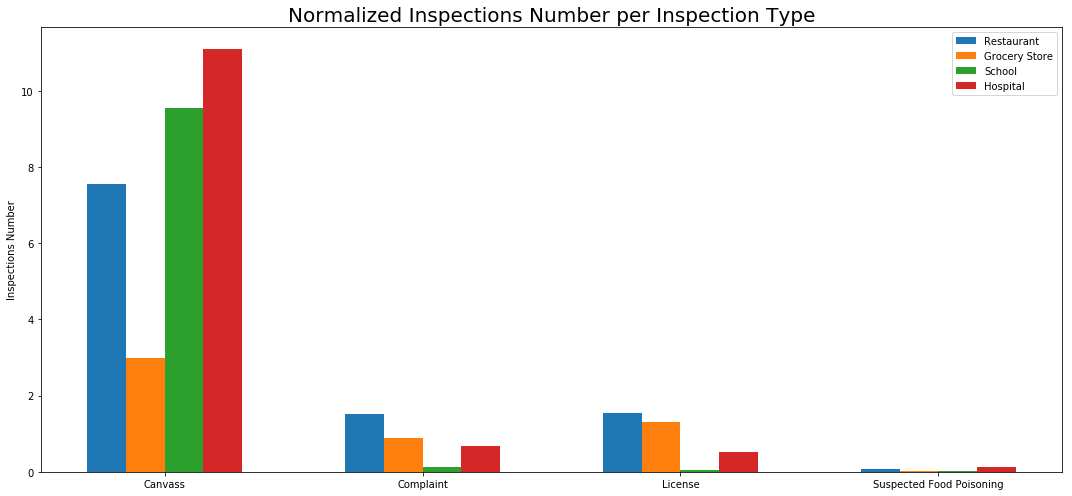

In [18]:
labels = inspectype

inspection_per_type_per_facility = food_inspectype_filtered.groupby(["Facility Type", "Inspection Type"]).count()["Inspection ID"].sort_index() / count_per_facility

resto_inspection_filt_count = inspection_per_type_per_facility['Restaurant']
grocery_inspection_filt_count = inspection_per_type_per_facility['Grocery Store']
school_inspection_filt_count = inspection_per_type_per_facility['School']
hospital_inspection_filt_count = inspection_per_type_per_facility['Hospital']

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize = (15, 7))
rects1 = ax.bar(x - 3*width/2, resto_inspection_filt_count, width, label='Restaurant')
rects2 = ax.bar(x - width/2, grocery_inspection_filt_count, width, label='Grocery Store')
rects3 = ax.bar(x + width/2, school_inspection_filt_count, width, label='School')
rects4 = ax.bar(x + 3*width/2, hospital_inspection_filt_count, width, label='Hospital')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Inspections Number')
ax.set_title('Normalized Inspections Number per Inspection Type', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

We can observe that it's the hospital there is the most of inspetions by canvass. And it's the restaurant where there were the most of inspections by complaints. Here we can observe that there is almost 0 complaints in school. For Licnese, it's in the restaurants and in the grocery store that there are the most of inspections. Finally, there are almost no inspections by suspected food poisoning for all facility type.

# Inspection Count per Restaurant

To compare values between differents restaurants, we computed total number of establishment for each restaurant than divide all the results values by those values.

In [19]:
restaurant_tmp = restaurants.drop_duplicates(subset="License #")
restaurant_tmp = restaurant_tmp.drop_duplicates(subset=["Latitude", "Longitude"])
count_per_restaurant = restaurant_tmp.groupby("AKA Name").count()['Inspection ID'].sort_values(ascending=False)

In [20]:
count_per_restaurant

AKA Name
SUBWAY           273
DUNKIN DONUTS    211
STARBUCKS        170
MCDONALDS        115
TACO BELL         30
Name: Inspection ID, dtype: int64

Here, we compute how many time there was a inspection for different restaurant.

In [21]:
inspection_count_per_restaurant = restaurants.groupby("AKA Name").count()['Inspection ID'].sort_values(ascending=False)

In [22]:
inspection_count_per_resataurant_normalized = inspection_count_per_restaurant / count_per_restaurant

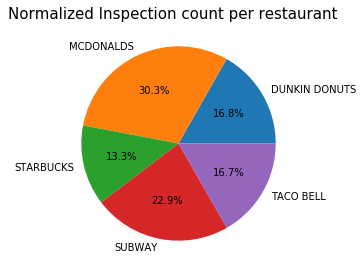

In [23]:
labels = inspection_count_per_resataurant_normalized.keys()
sizes = inspection_count_per_resataurant_normalized.values

fig1, ax1 = plt.subplots()
fig1.suptitle("Normalized Inspection count per restaurant", fontsize=15)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal') 

plt.show()

We can observe that it's MCDONALDS where the most of the inspections have been done.

### Inspection Count per year per Restaurant

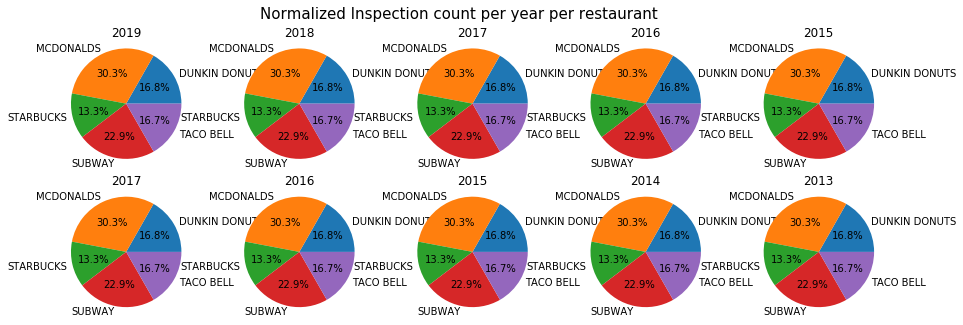

In [24]:
labels = inspection_count_per_resataurant_normalized.keys()
fig, ax= plt.subplots(2,5,figsize=(15,5))
fig.suptitle("Normalized Inspection count per year per restaurant", fontsize=15)
for i in range(2):
    for j in range(5):
        data = restaurants[restaurants["Inspection Date"] == years.reshape(2, 5)[i, j]]
        data = restaurants.groupby("AKA Name").count()['Inspection ID'].sort_values()
        data = data / count_per_restaurant
        sizes = data.values

        ax[i, j].pie(sizes, labels=labels, autopct='%1.1f%%')
        ax[i, j].axis('equal')
        ax[i, j].title.set_text(years[i*2 + j])

plt.show()

### Inspection Count per Restaurant over year

In [25]:
# we count inspections number per restaurant and per year 
inspection_count_per_year_per_restaurant = restaurants.groupby(["AKA Name", "Inspection Date"]).count()["Inspection ID"].sort_index() / count_per_restaurant

MCDO_inspection_count = inspection_count_per_year_per_restaurant['MCDONALDS']
DUNKIN_inspection_count = inspection_count_per_year_per_restaurant['DUNKIN DONUTS']
TACO_inspection_count = inspection_count_per_year_per_restaurant['TACO BELL']
SUBWAY_inspection_count = inspection_count_per_year_per_restaurant['SUBWAY']
STARBUCKS_inspection_count = inspection_count_per_year_per_restaurant['STARBUCKS']

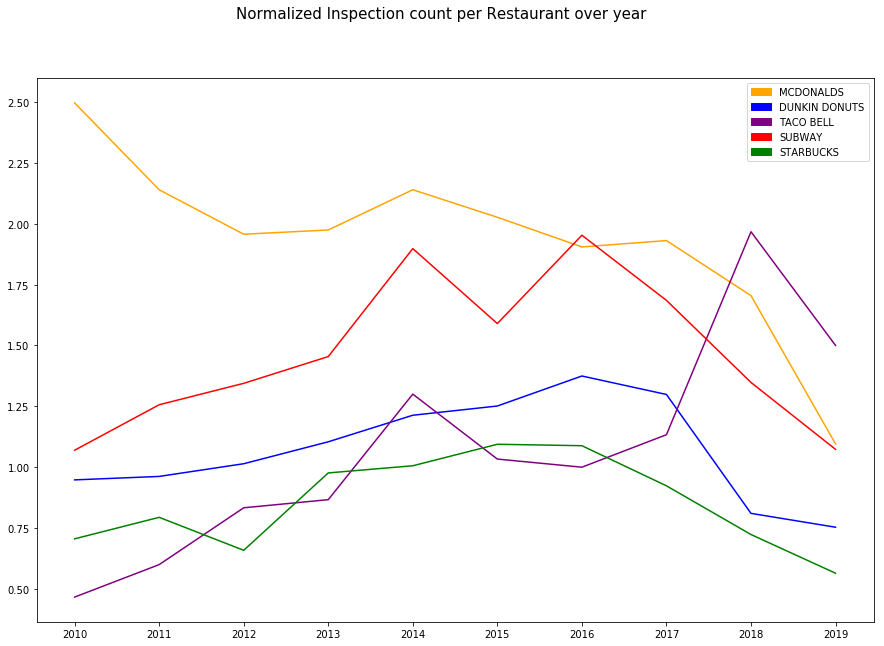

In [26]:
fig = plt.figure(figsize = (15, 10))
fig.suptitle("Normalized Inspection count per Restaurant over year", fontsize=15)

plt.plot(MCDO_inspection_count, 'orange')
plt.plot(DUNKIN_inspection_count, 'blue')
plt.plot(TACO_inspection_count, 'purple')
plt.plot(SUBWAY_inspection_count, 'red')
plt.plot(STARBUCKS_inspection_count, 'green')

orange_patch = mpatches.Patch(color='orange', label='MCDONALDS')
blue_patch = mpatches.Patch(color='blue', label='DUNKIN DONUTS')
purple_patch = mpatches.Patch(color='purple', label='TACO BELL')
red_patch = mpatches.Patch(color='red', label='SUBWAY')
green_patch = mpatches.Patch(color='green', label='STARBUCKS')

plt.legend(handles=[orange_patch, blue_patch, purple_patch, red_patch, green_patch])

plt.show()

We can observe that recently there is a diminuation of the inspections for all restaurants except for taco bell where there is a big augmentation of inspections in 2018.

### Inspection Count per Restaurant per Inspection Types

In [27]:
# Filter only most recurrents inspection types
inspectype = ['Canvass', 'Complaint', 'License', 'Suspected Food Poisoning']

restaurants_inspectype_filtered = restaurants.copy()
# group License, License Re-Inspection
restaurants_inspectype_filtered.loc[restaurants_inspectype_filtered['Inspection Type'] == 'License Re-Inspection'] = 'License'
# group Canvass, Canvass Re-Inspection
restaurants_inspectype_filtered.loc[restaurants_inspectype_filtered['Inspection Type'] == 'Canvass Re-Inspection'] = 'Canvass'
# group Complaint, Short Form Complaint, Complaint Re-Inspection
restaurants_inspectype_filtered.loc[restaurants_inspectype_filtered['Inspection Type'].isin(['Short Form Complaint', 'Complaint Re-Inspection'])] = 'Complaint'
# group Suspected Food Poisoning, Suspected Food Poisoning Re-Inspection
restaurants_inspectype_filtered.loc[restaurants_inspectype_filtered['Inspection Type'] == 'Suspected Food Poisoning Re-inspection'] = 'Suspected Food Poisoning'

restaurants_inspectype_filtered = restaurants_inspectype_filtered[restaurants_inspectype_filtered['Inspection Type'].isin(inspectype)]

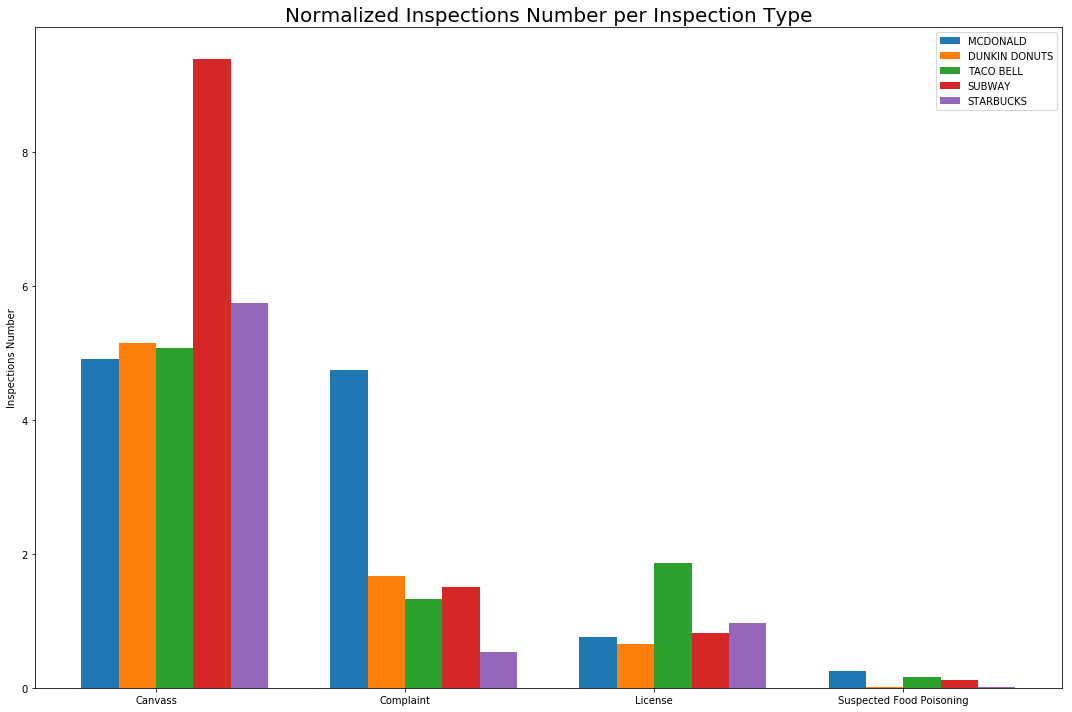

In [28]:
labels = inspectype

inspection_per_type_per_restaurant = restaurants_inspectype_filtered.groupby(["AKA Name", "Inspection Type"]).count()["Inspection ID"].sort_index() / count_per_restaurant

MCDO_inspection_filt_count = inspection_per_type_per_restaurant['MCDONALDS']
DUNKIN_inspection_filt_count = inspection_per_type_per_restaurant['DUNKIN DONUTS']
TACO_inspection_filt_count = inspection_per_type_per_restaurant['TACO BELL']
SUBWAY_inspection_filt_count = inspection_per_type_per_restaurant['SUBWAY']
STARBUCKS_inspection_filt_count = inspection_per_type_per_restaurant['STARBUCKS']

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize = (15, 10))
rects1 = ax.bar(x - 3*width/2, MCDO_inspection_filt_count, width, label='MCDONALD')
rects2 = ax.bar(x - width/2, DUNKIN_inspection_filt_count, width, label='DUNKIN DONUTS')
rects3 = ax.bar(x + width/2, TACO_inspection_filt_count, width, label='TACO BELL')
rects4 = ax.bar(x + 3*width/2, SUBWAY_inspection_filt_count, width, label='SUBWAY')
rects5 = ax.bar(x + 5*width/2, STARBUCKS_inspection_filt_count, width, label='STARBUCKS')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Inspections Number')
ax.set_title('Normalized Inspections Number per Inspection Type', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

We can observe that it's the SUBWAY where there is the most of inspetions by canvass. And it's the MCDONALD where there were the most of inspections by complaints. For Licnese, it's TACO BELL that there are the most of inspections. Finally, it's MCDONALD where there is the most of suspected food poisoning.